In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# EAS 503 Final Project 
## Group 6

In [56]:
import pymysql
import pandas as pd

In [58]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [59]:
conn = pymysql.connect(host='localhost', port=3306, user='root', passwd='99667711', db='mysql')
cur = conn.cursor()
cur.execute("use eas503proj")

0

In [85]:
cur.execute("DROP VIEW IF EXISTS 5ESSENTIAL1617;")
cur.execute("""CREATE VIEW 5ESSENTIAL1617 
                         AS SELECT Temp.School_ID AS School_ID, Short_Name, 
                         cps1314.Community_Area_Number AS District, neiborhood.Area,
                         (School_Survey_Involved_Families+School_Survey_Supportive_Environment
                             +School_Survey_Ambitious_Instruction+School_Survey_Effective_Leaders
                             +School_Survey_Collaborative_Teachers)/5 AS AVG_5Essencial,
                         School_Survey_Involved_Families, School_Survey_Supportive_Environment,
                         School_Survey_Ambitious_Instruction, School_Survey_Effective_Leaders, 
                         School_Survey_Collaborative_Teachers, temp.School_Latitude As School_Latitude, 
                         temp.School_Longitude As School_Longitude 
                         FROM temp, cps1314, neiborhood 
                         WHERE neiborhood.Community_Num=cps1314.Community_Area_Number 
                         AND temp.School_ID=cps1314.School_ID
            """)

0

In [61]:
df = pd.read_sql("""SELECT District,  AVG_5Essencial 
                     FROM 5ESSENTIAL1617 
                     GROUP BY District 
                     ORDER BY AVG_5Essencial DESC LIMIT 5 """, con=conn)
df

,District,AVG_5Essencial
0,59,5.0
1,22,4.8
2,11,4.8
3,26,4.6
4,8,4.6


In [62]:
df = pd.read_sql("""SELECT District, AVG_5Essencial 
                     FROM 5ESSENTIAL1617 
                     GROUP BY District 
                     ORDER BY AVG_5Essencial LIMIT 5 """, con=conn)
df

,District,AVG_5Essencial
0,42,2.4
1,61,2.6
2,63,2.8
3,29,2.8
4,27,2.8


In [88]:
Num_School=pd.read_sql('SELECT District,  count(*) AS Num_School FROM 5ESSENTIAL1617 GROUP BY District;', con=conn)
Num_School

,District,Num_School
0,1,5
1,2,8
2,3,6
3,4,4
4,5,5
5,6,10
6,7,6
7,8,5
8,9,1
9,10,7


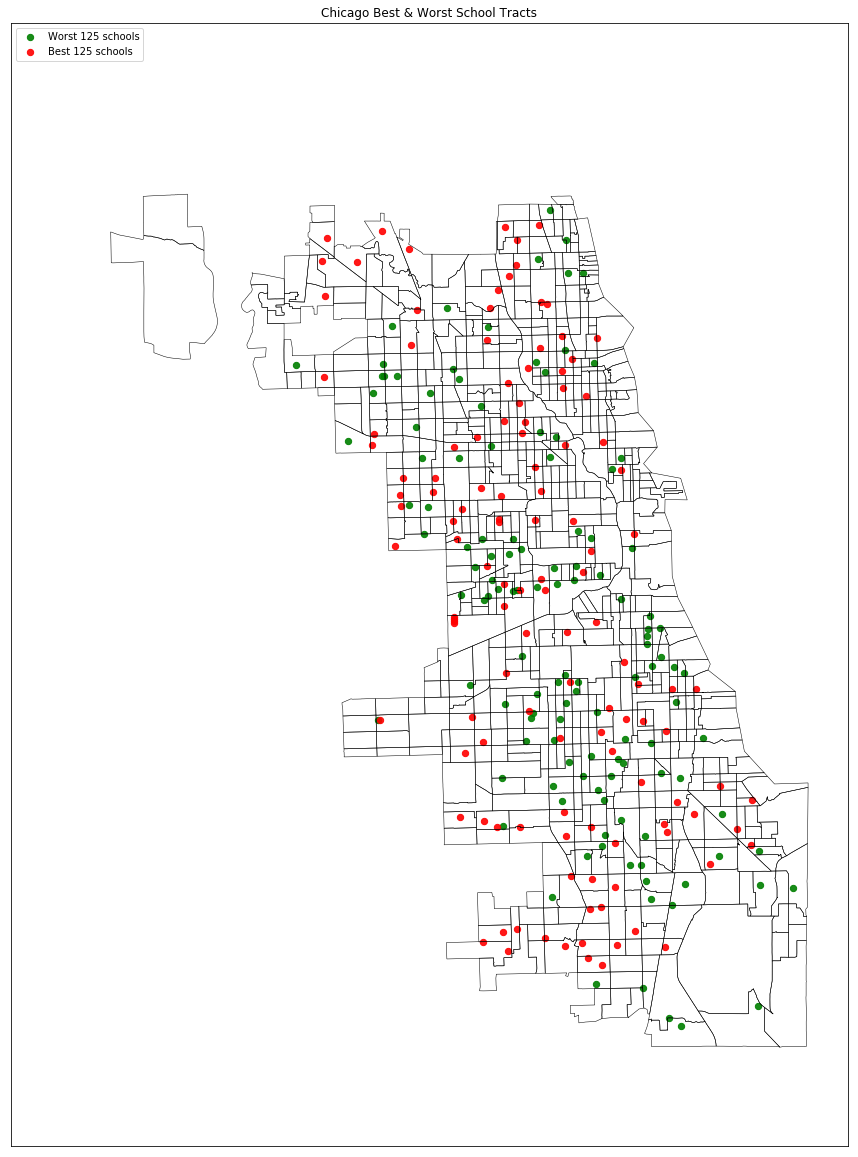

In [63]:

worst_school = pd.read_sql("""SELECT School_Latitude, School_Longitude, AVG_5Essencial 
                           FROM 5ESSENTIAL1617 ORDER BY AVG_5Essencial LIMIT 125;""", con=conn)    
best_school = pd.read_sql("""SELECT School_Latitude, School_Longitude,AVG_5Essencial 
                          FROM 5ESSENTIAL1617 ORDER BY AVG_5Essencial DESC LIMIT 125;""", con=conn)


    
                 
plt.figure(figsize=(15,35))
m = Basemap(projection='merc',llcrnrlat=41.60,urcrnrlat=42.10,\
        llcrnrlon=-88.0,urcrnrlon=-87.50,lat_ts=20,resolution='c')
m.readshapefile('./geo_export_0e3da441-8fe8-4e11-9ca0-42ef75cab68e','chicago')

worst_school_long=worst_school["School_Longitude"].tolist()
worst_school_lat=worst_school["School_Latitude"].tolist()
wx,wy = m(worst_school_long,worst_school_lat)


best_school_long=best_school["School_Longitude"].tolist()
best_school_lat=best_school["School_Latitude"].tolist()
x,y = m(best_school_long,best_school_lat)


colors= ("green", "red")
label=('Worst 125 schools','Best 125 schools')
data_w=(wx,wy)
data_b=(x,y)
data=(data_w,data_b)
for i,j, r in zip(data, colors,label):
    u, v=i
    plt.scatter(u,v,alpha=0.9,s=40, c=j, label=r )

plt.title("Chicago Best & Worst School Tracts")
plt.legend(loc=2)
plt.show()

In [84]:
Num_School=pd.read_sql('SELECT Area,  count(*) AS Num_School FROM 5ESSENTIAL1617 GROUP BY AREA;', con=conn)
Num_School

,Area,Num_School
0,Central,8
1,Far North side,53
2,Far Southeast side,59
3,Far Southwest side,37
4,North Side,35
5,Northwest side,33
6,South Side,53
7,Southwest side,72
8,West Side,107


In [64]:
Region_AVG_5E= pd.read_sql('SELECT Area,  AVG_5Essencial FROM 5ESSENTIAL1617 GROUP BY Area ORDER BY Area', con=conn)
Region_AVG_5E

,Area,AVG_5Essencial
0,Central,4.2
1,Far North side,4.2
2,Far Southeast side,3.8
3,Far Southwest side,3.4
4,North Side,3.2
5,Northwest side,3.6
6,South Side,3.8
7,Southwest side,2.6
8,West Side,4.4


In [65]:
Region_AVG_5E_ra=Region_AVG_5E['AVG_5Essencial'].tolist()
Region_AVG_5E_rate=[x/5*100 for x in Region_AVG_5E_ra]


In [66]:
cur.execute("Drop VIEW IF EXISTS CPS1617_RATES;")
cur.execute("""CREATE VIEW CPS1617_Rates AS SELECT  cpspr1617.School_ID AS School_ID, 
 cpspr1617.Short_Name As School_Name,
 neiborhood.Area As Region, 
 neiborhood.Community_Area As District,
 (Suspensions_Per_100_Students_Year_1_Pct+Suspensions_Per_100_Students_Year_2_Pct)/2 AS Suspension_Rate_Per_100,
 (College_Enrollment_School_Pct_Year_1+College_Enrollment_School_Pct_Year_2)/2 As College_Enrollment_Rate, 
 (Student_Attendance_Year_1_Pct+Student_Attendance_Year_2_Pct)/2 AS Student_Attendance_Rate, 
 cpspr1617.School_Latitude AS School_Latitude, 
 cpspr1617.School_Longitude AS School_Longitude
 From cpspr1617 join  neiborhood join cps1314  
 WHERE cpspr1617.School_ID=cps1314.School_ID AND 
 neiborhood.Community_Num=cps1314.Community_Area_Number 
 AND cps1314.`School Category`='HS';""")



cur.execute("Drop VIEW IF EXISTS CPS1617_District_avg;")
cur.execute("""Create VIEW CPS1617_District_avg As 
                SELECT District, 
                Region,   
                avg(College_Enrollment_Rate) As avg_College_enroll,  
                avg(Student_Attendance_Rate) as avg_Attendance,  
                avg(Suspension_Rate_Per_100)    
                FROM CPS1617_Rates GROUP BY Region;""")


0

In [67]:
Total_Avg_College_Enroll=pd.read_sql('SELECT avg(avg_College_enroll) As Total_avg FROM CPS1617_District_avg', con=conn)


In [49]:
Region_Avg_College_Enroll=pd.read_sql("""SELECT Region,  avg_College_enroll 
                                            FROM CPS1617_District_avg 
                                          ORDER BY Region""", con=conn)
Region_Avg_College_Enroll

,Region,avg_College_enroll
0,Central,86.575000
1,Far North side,63.780000
2,Far Southeast side,51.794444
3,Far Southwest side,60.837500
4,North Side,79.150000
5,Northwest side,52.308333
6,South Side,60.445000
7,Southwest side,51.150000
8,West Side,49.230952


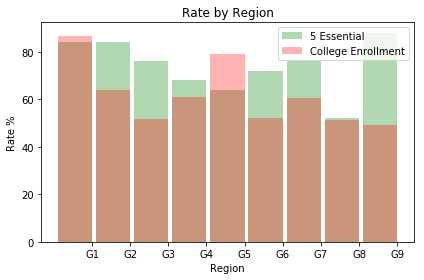

In [91]:
T_avg=Total_Avg_College_Enroll['Total_avg']
N_R=Region_Avg_College_Enroll['Region']
avg_En=Region_Avg_College_Enroll['avg_College_enroll'].tolist()
avg_5E=Region_AVG_5E['AVG_5Essencial'].tolist()
x_l=('G1','G2',"G3",'G4','G5','G6','G7','G8','G9')


n_groups=len(avg_En)
fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = .9
opacity = 0.3

l=('5 Essential','College Enrollment')
data=(Region_AVG_5E_rate, avg_En)

cm= ("green", "red")

for i,c,j in zip(data, cm, l):
    plt.bar(index, i, bar_width, alpha=opacity,
                 color=c, label=j )
    
plt.xlabel('Region')
plt.ylabel('Rate %')
plt.title('Rate by Region')
plt.xticks(index + bar_width/2,x_l )
plt.legend()
plt.tight_layout()
plt.show()


In [51]:
conn.close()